In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [7]:
mnist = pd.read_csv(r'C:\Users\ZEESHAAN\Downloads\mnist\mnist_train.csv')


In [8]:
mnist.head(5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
mnist.shape

(60000, 785)

In [15]:
data = np.array(mnist)
m, n = data.shape
np.random.shuffle(data)

In [16]:
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [17]:
Y_train

array([1, 4, 7, ..., 3, 8, 0], dtype=int64)

In [18]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

In [19]:
def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [20]:
def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [21]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

In [22]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [23]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2


In [24]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [25]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[1 7 9 ... 7 1 1] [1 4 7 ... 3 8 0]
0.1441864406779661
Iteration:  10
[1 7 9 ... 1 1 1] [1 4 7 ... 3 8 0]
0.24410169491525424
Iteration:  20
[1 9 9 ... 8 1 1] [1 4 7 ... 3 8 0]
0.3298305084745763
Iteration:  30
[1 9 9 ... 3 1 0] [1 4 7 ... 3 8 0]
0.3868135593220339
Iteration:  40
[1 9 9 ... 3 8 0] [1 4 7 ... 3 8 0]
0.4444745762711864
Iteration:  50
[1 7 9 ... 3 8 0] [1 4 7 ... 3 8 0]
0.49984745762711863
Iteration:  60
[1 9 9 ... 3 8 0] [1 4 7 ... 3 8 0]
0.5447457627118644
Iteration:  70
[1 9 9 ... 3 8 0] [1 4 7 ... 3 8 0]
0.583457627118644
Iteration:  80
[1 9 9 ... 3 8 0] [1 4 7 ... 3 8 0]
0.6142542372881356
Iteration:  90
[1 9 9 ... 3 8 0] [1 4 7 ... 3 8 0]
0.6376610169491526
Iteration:  100
[1 9 9 ... 3 8 0] [1 4 7 ... 3 8 0]
0.6579661016949152
Iteration:  110
[1 9 9 ... 3 8 0] [1 4 7 ... 3 8 0]
0.6752033898305084
Iteration:  120
[1 9 7 ... 3 8 0] [1 4 7 ... 3 8 0]
0.6893389830508475
Iteration:  130
[1 9 7 ... 3 8 0] [1 4 7 ... 3 8 0]
0.7033559322033899
Iteration:  140


In [26]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  1


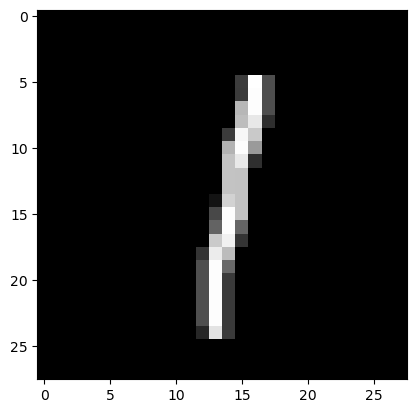

In [29]:
test_prediction(0, W1, b1, W2, b2)

Prediction:  [5]
Label:  6


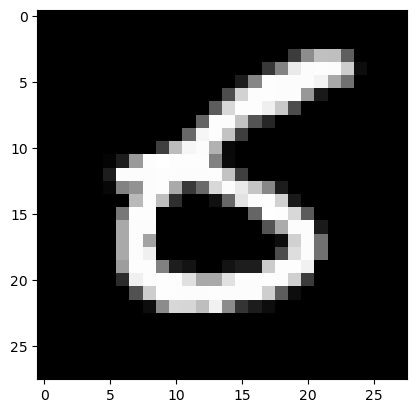

In [30]:
test_prediction(6, W1, b1, W2, b2)

Prediction:  [9]
Label:  9


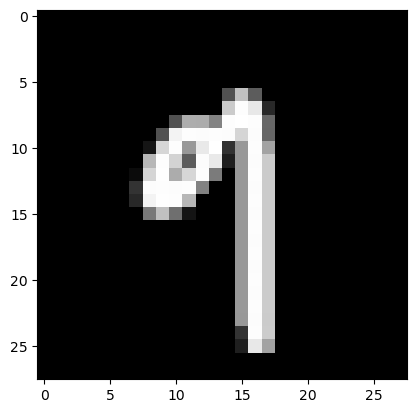

In [32]:
test_prediction(8, W1, b1, W2, b2)


In [33]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[3 8 3 6 8 5 2 7 6 8 4 9 7 1 1 6 4 5 4 7 2 1 7 5 4 1 9 5 6 4 1 5 9 8 1 1 8
 5 6 9 0 2 6 3 8 7 2 7 3 6 6 0 0 2 5 0 7 3 1 5 4 7 3 0 0 2 5 3 4 5 9 1 8 1
 6 0 8 2 2 7 7 5 1 8 6 2 6 8 4 5 4 4 0 2 5 0 6 5 5 9 2 6 0 4 6 0 8 7 7 5 9
 0 2 8 7 6 5 3 1 0 3 7 5 4 4 9 1 7 9 1 7 0 0 4 5 3 1 2 8 1 9 6 3 7 5 2 4 0
 3 8 3 0 0 7 7 2 4 6 5 6 5 1 2 8 8 8 5 2 2 8 5 5 7 1 9 0 1 9 7 0 8 2 6 0 2
 7 1 6 1 7 8 6 9 1 8 5 0 4 0 3 9 4 2 9 8 8 3 6 9 7 3 1 9 2 1 9 0 7 2 5 5 0
 1 3 8 8 3 3 3 8 9 6 7 8 0 5 7 7 2 5 2 6 0 4 4 2 8 0 2 9 2 1 5 8 5 5 6 2 9
 6 1 3 0 2 0 3 2 8 7 3 0 3 7 9 2 4 2 6 8 7 7 7 7 1 9 3 2 1 3 6 3 5 9 8 8 6
 1 6 3 6 0 2 2 6 4 1 1 1 2 2 5 0 0 6 7 8 9 2 5 4 4 2 9 1 8 7 7 7 6 8 6 3 8
 7 8 8 9 0 7 8 2 3 3 7 2 4 8 9 0 7 1 0 1 0 9 9 4 2 1 4 2 6 9 2 4 7 1 1 4 7
 3 8 4 6 1 4 1 0 2 7 3 7 5 4 0 6 6 2 3 6 1 2 9 0 7 8 2 2 1 3 1 6 1 6 2 6 1
 3 9 5 0 2 7 2 8 0 9 6 7 8 4 4 2 3 8 7 4 4 9 2 6 9 8 0 8 0 2 7 7 5 2 9 8 1
 6 6 6 8 3 3 2 9 1 2 2 0 0 0 2 6 5 0 5 1 4 0 7 0 1 9 4 1 1 6 8 3 4 7 8 7 5
 3 7 9 4 8 5 7 8 2 0 8 2 

0.862